# House Price Prediction Using Stacked Regression

Student: **Daniyal Mehraeen**

In [322]:
import numpy as np
import seaborn as sns
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import os
from scipy import stats

### Part A:

Reading the Data and showing the first 5 Rows

In [323]:
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

train_data.shape
# test_data.shape

(1460, 81)

In [324]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [325]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.0525
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.3940
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.6836
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.4775
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.0800


### Part B:

In [326]:
# Selecting only the numrical columns
numeric_feats = train_data.select_dtypes(np.number)

# Removing the Response Column from features
numeric_feats = numeric_feats.iloc[:,:-1]

z_scores = np.abs(numeric_feats-numeric_feats.mean())/numeric_feats.std()

z_scores

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.730272,0.073350,0.207948,0.207071,0.651256,0.517023,1.050634,0.878367,0.509840,0.575228,...,0.350880,0.751918,0.216429,0.359202,0.116299,0.270116,0.068668,0.087658,1.598563,0.138730
1,1.727900,0.872264,0.409724,0.091855,0.071812,2.178881,0.156680,0.429430,0.572637,1.171591,...,0.060710,1.625638,0.704242,0.359202,0.116299,0.270116,0.068668,0.087658,0.488943,0.614228
2,1.725528,0.073350,0.084413,0.073455,0.651256,0.517023,0.984415,0.829930,0.322063,0.092875,...,0.631510,0.751918,0.070337,0.359202,0.116299,0.270116,0.068668,0.087658,0.990552,0.138730
3,1.723156,0.309753,0.413838,0.096864,0.651256,0.517023,1.862993,0.720051,0.572637,0.499103,...,0.790533,0.751918,0.175988,4.091122,0.116299,0.270116,0.068668,0.087658,1.598563,1.367186
4,1.720785,0.073350,0.574436,0.375020,1.374324,0.517023,0.951306,0.733056,1.360357,0.463410,...,1.697903,0.779930,0.563567,0.359202,0.116299,0.270116,0.068668,0.087658,2.100173,0.138730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.720785,0.073350,0.331482,0.260471,0.071812,0.517023,0.918196,0.733056,0.572637,0.972685,...,0.060710,0.751918,0.100523,0.359202,0.116299,0.270116,0.068668,0.087658,0.620678,0.614228
1456,1.723156,0.872264,0.615614,0.266316,0.071812,0.381612,0.222899,0.151813,0.084581,0.759399,...,0.126376,2.032535,0.704242,0.359202,0.116299,0.270116,0.068668,0.087658,1.598563,1.644646
1457,1.725528,0.309753,0.166770,0.147760,0.651256,3.077516,1.002149,1.023678,0.572637,0.369744,...,1.033560,0.751918,0.201336,0.359202,0.116299,0.270116,0.068668,4.951415,0.488943,1.644646
1458,1.727900,0.872264,0.084413,0.080133,0.794879,0.381612,0.704164,0.539309,0.572637,0.865252,...,1.089686,2.168167,0.704242,1.473284,0.116299,0.270116,0.068668,0.087658,0.858816,1.644646


In [327]:
threshold = 3

# Find indices of outlier rows
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

# Remove outlier rows from the data
data_without_outliers = train_data.drop(outlier_indices)
data_without_outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000


In [328]:
train_data = data_without_outliers

### Part C:

<Axes: xlabel='SalePrice', ylabel='Count'>

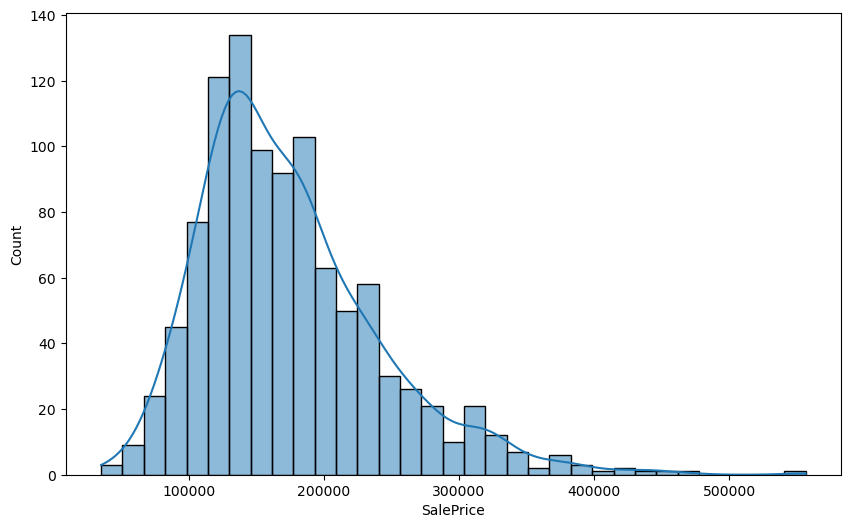

In [329]:
plt.figure(figsize=(10,6))

sns.histplot(data=train_data, x='SalePrice', kde=True)

In [330]:
print(train_data["SalePrice"])

0       208500
2       223500
4       250000
6       307000
10      129500
         ...  
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
Name: SalePrice, Length: 1023, dtype: int64


In [331]:
# Normalizing the Data using Z-Score
target_col = train_data["SalePrice"]
train_data["SalePrice"] = (target_col - target_col.mean())/target_col.std()

print(train_data["SalePrice"])


0       0.508308
2       0.731957
4       1.127070
6       1.976935
10     -0.669576
          ...   
1452   -0.438472
1453   -1.340523
1454    0.157925
1455    0.008825
1456    0.530673
Name: SalePrice, Length: 1023, dtype: float64


1.0000000000000009

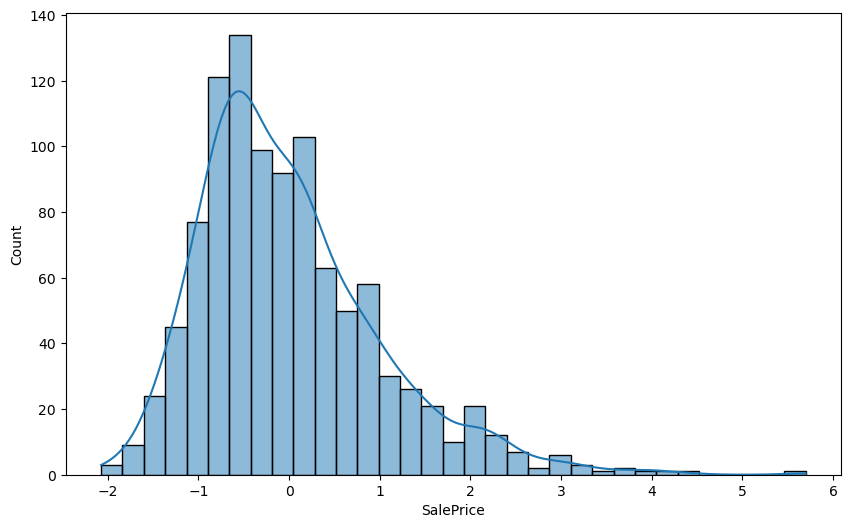

In [332]:
plt.figure(figsize=(10,6))

sns.histplot(data=train_data, x='SalePrice', kde=True)

train_data["SalePrice"].std()


### Part D:

In [333]:
# Modifying the Nan Values in the dataset:
train_data = train_data.fillna(method="ffill")
train_data = train_data.dropna(axis=1, how='all')
train_data = train_data.fillna(0)

# Selecting the numerical features
train_data = train_data.select_dtypes(np.number)

na_count = pd.isna(train_data).sum().sum()
print(na_count)

0


In [334]:
train_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,0.508308
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,0.731957
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,1.127070
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,1.976935
10,11,20,70.0,11200,5,5,1965,1965,0.0,906,...,0,0,0,0,0,0,0,2,2008,-0.669576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,0,28,0,0,0,0,0,5,2006,-0.438472
1453,1454,20,90.0,17217,5,5,2006,2006,0.0,0,...,36,56,0,0,0,0,0,7,2006,-1.340523
1454,1455,20,62.0,7500,7,5,2004,2005,0.0,410,...,0,113,0,0,0,0,0,10,2009,0.157925
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,0.008825


### Part E:

In [335]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [336]:
X = train_data.iloc[:,:-1]
y =  train_data["SalePrice"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
lasso_best_params = lasso_grid.best_params_
lasso_best_model = lasso_grid.best_estimator_
lasso_predictions = lasso_best_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

# Elastic Net Regression
elastic_net = ElasticNet()
elastic_net_params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.25, 0.5, 0.75]}
elastic_net_grid = GridSearchCV(elastic_net, elastic_net_params, cv=5)
elastic_net_grid.fit(X_train, y_train)
elastic_net_best_params = elastic_net_grid.best_params_
elastic_net_best_model = elastic_net_grid.best_estimator_
elastic_net_predictions = elastic_net_best_model.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_predictions)

# Kernel Ridge Regression
kernel_ridge = KernelRidge()
kernel_ridge_params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}
kernel_ridge_grid = GridSearchCV(kernel_ridge, kernel_ridge_params, cv=5)
kernel_ridge_grid.fit(X_train, y_train)
kernel_ridge_best_params = kernel_ridge_grid.best_params_
kernel_ridge_best_model = kernel_ridge_grid.best_estimator_
kernel_ridge_predictions = kernel_ridge_best_model.predict(X_test)
kernel_ridge_mse = mean_squared_error(y_test, kernel_ridge_predictions)

# Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor()
gradient_boosting_params = {'learning_rate': [0.001, 0.01, 0.1, 0.5]}
gradient_boosting_grid = GridSearchCV(gradient_boosting, gradient_boosting_params, cv=5)
gradient_boosting_grid.fit(X_train, y_train)
gradient_boosting_best_params = gradient_boosting_grid.best_params_
gradient_boosting_best_model = gradient_boosting_grid.best_estimator_
gradient_boosting_predictions = gradient_boosting_best_model.predict(X_test)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)

In [337]:
# Print the best parameters and RMSE for each model
print("Lasso Regression")
print("Best Parameters:", lasso_best_params)
print("MSE:", lasso_mse, end="\n\n")

print("Elastic Net Regression")
print("Best Parameters:", elastic_net_best_params)
print("MSE:", elastic_net_mse, end="\n\n")

print("Kernel Ridge Regression")
print("Best Parameters:", kernel_ridge_best_params)
print("MSE:", kernel_ridge_mse, end="\n\n")

print("Gradient Boosting Regression")
print("Best Parameters:", gradient_boosting_best_params)
print("MSE:", gradient_boosting_mse) 

Lasso Regression
Best Parameters: {'alpha': 0.001}
MSE: 0.10684464831281337

Elastic Net Regression
Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.5}
MSE: 0.10708405469400485

Kernel Ridge Regression
Best Parameters: {'alpha': 10.0, 'kernel': 'linear'}
MSE: 0.1064056006635998

Gradient Boosting Regression
Best Parameters: {'learning_rate': 0.1}
MSE: 0.08442068811836226


### Part F:

In [338]:
print(test_data.shape)
test_data.head()

(1459, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.0525
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.3940
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.6836
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.4775
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.0800


In [341]:
# Modifying the Nan Values in the dataset:
test_data = test_data.fillna(method="ffill")
test_data = test_data.dropna(axis=1, how='all')
test_data = test_data.fillna(0)

# Selecting the numerical features
test_data = test_data.select_dtypes(np.number)

na_count = pd.isna(test_data).sum().sum()
print(na_count)

test_data

0


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,140,0,0,0,120,0,0,6,2010,169277.0525
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,393,36,0,0,0,0,12500,6,2010,187758.3940
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,212,34,0,0,0,0,0,3,2010,183583.6836
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,360,36,0,0,0,0,0,6,2010,179317.4775
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,82,0,0,144,0,0,1,2010,150730.0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,167081.2209
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,24,0,0,0,0,0,4,2006,164788.7782
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,474,0,0,0,0,0,0,9,2006,219222.4234
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,80,32,0,0,0,0,700,7,2006,184924.2797


In [347]:
X_test = test_data.iloc[:,:-1]
y_test = test_data["SalePrice"]

# Evaluate Lasso Regression
lasso_predictions = lasso_best_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

# Evaluate Elastic Net Regression
elastic_net_predictions = elastic_net_best_model.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_predictions)
elastic_net_r2 = r2_score(y_test, elastic_net_predictions)

# Evaluate Kernel Ridge Regression
kernel_ridge_predictions = kernel_ridge_best_model.predict(X_test)
kernel_ridge_mse = mean_squared_error(y_test, kernel_ridge_predictions)
kernel_ridge_r2 = r2_score(y_test, kernel_ridge_predictions)

# Evaluate Gradient Boosting Regression
gradient_boosting_predictions = gradient_boosting_best_model.predict(X_test)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_predictions)

# Print the MSE and R2 for each model
print("Lasso Regression")
print("MSE:", lasso_mse)
print("R2:", lasso_r2,end="\n\n")

print("Elastic Net Regression")
print("MSE:", elastic_net_mse)
print("R2:", elastic_net_r2,end="\n\n")

print("Kernel Ridge Regression")
print("MSE:", kernel_ridge_mse)
print("R2:", kernel_ridge_r2,end="\n\n")

print("Gradient Boosting Regression")
print("MSE:", gradient_boosting_mse)
print("R2:", gradient_boosting_r2)

Lasso Regression
MSE: 32379514896.678642
R2: -117.7509921325605

Elastic Net Regression
MSE: 32379514157.415333
R2: -117.75098942133236

Kernel Ridge Regression
MSE: 32379516049.88785
R2: -117.75099636192398

Gradient Boosting Regression
MSE: 32379529201.302315
R2: -117.75104459437961


### Part H:

In [351]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = train_data.iloc[:,:-1]
y = train_data["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = [
    Lasso(),
    ElasticNet(),
    KernelRidge(),
    GradientBoostingRegressor()
]

base_model_predictions = []
for model in base_models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    base_model_predictions.append(predictions)

meta_X = np.column_stack(base_model_predictions)

meta_model = LinearRegression()

meta_model.fit(meta_X, y_test)

(205,)

### Part I:

In [352]:
X_test = test_data.iloc[:,:-1]
y_test = test_data["SalePrice"]

base_model_predictions_test = []
for model in base_models:
    predictions = model.predict(X_test)
    base_model_predictions_test.append(predictions)

meta_X = np.column_stack(base_model_predictions_test)

# Make predictions using the stacked model
stacked_predictions = meta_model.predict(meta_X)

stacked_mse = mean_squared_error(y_test, stacked_predictions)
stacked_r2 = r2_score(y_test, gradient_boosting_predictions)

print("Stacked Regression")
print("MSE:", stacked_mse)
print("R2:", stacked_r2)

Stacked Regression
MSE: 32379515373.114407
R2: -117.75104459437961


In [355]:
methods = [
    "Lasso",
    "Elastic Net",
    "Kernel Ridge",
    "Gradient Boosting",
    "Stacked"
    ]

mse_scores = [
    lasso_mse,
    elastic_net_mse,
    kernel_ridge_mse,
    gradient_boosting_mse,
    stacked_mse
    ]

r2_scores = [
    lasso_r2,
    elastic_net_r2,
    kernel_ridge_r2,
    gradient_boosting_r2,
    stacked_r2
    ]

Text(0.5, 1.0, 'R2 Scores')

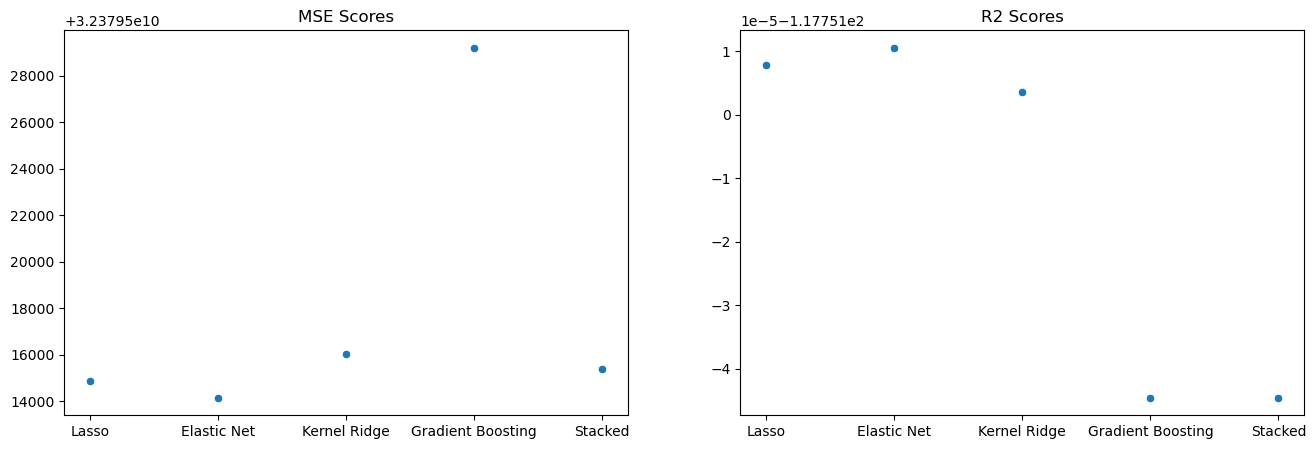

In [370]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(16, 5))
axs = axs.flatten()

sns.scatterplot(x=methods,y=mse_scores, ax=axs[0])
axs[0].set_title("MSE Scores")

sns.scatterplot(x=methods,y=r2_scores, ax=axs[1])
axs[1].set_title("R2 Scores")
